## Intro till Pandas
- series objekt
- DataFrame objekt

In [13]:
import pandas as pd

data = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series = pd.Series(data = data)
series

AI      25
NET     30
APP     27
Java    23
dtype: int64

In [6]:
data2 = data = dict(AI = "25", NET = 30, APP = 27, Java = 23)
pd.Series(data=data2)

AI      25
NET     30
APP     27
Java    23
dtype: object

In [19]:
series[0]
(series.keys()[-2])

'APP'

In [24]:
columns = ["Number students"]
df = pd.DataFrame(series, columns=columns)
print(df)

      Number students
AI                 25
NET                30
APP                27
Java               23


In [29]:
languages = pd.Series(dict(AI = "python", NET = "C#", APP = "Cotlin", Java = "Java"))
df = pd.DataFrame({"Students":series,"Languages":languages})
print(df)

      Students Languages
AI          25    python
NET         30        C#
APP         27    Cotlin
Java        23      Java


In [26]:
df.index

Index(['AI', 'NET', 'APP', 'Java'], dtype='object')

## Data selection

In [30]:
df["Students"]

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [33]:
df[["Languages", "Students"]]

,Languages,Students
AI,python,25
NET,C#,30
APP,Cotlin,27
Java,Java,23


In [38]:
df["Numerous"] = df["Students"] > 24
print(df)
large_groups = df[df["Numerous"]]



      Students Languages  Numerous
AI          25    python      True
NET         30        C#      True
APP         27    Cotlin      True
Java        23      Java     False


Text(0.5, 1.0, 'Antal studenter i olika program')

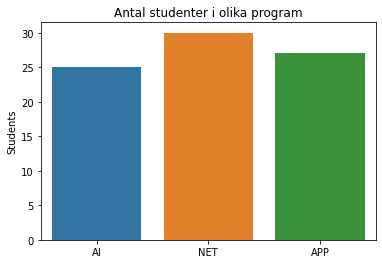

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data = large_groups, x=large_groups.index, y = "Students")
plt.title("Antal studenter i olika program")

In [63]:
df = pd.read_excel("Data/calories.xlsx")
df.head()
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB
None
             FoodCategory    FoodItem per100grams Cals_per100grams  \
count                2225        2225        2225             2225   
unique                 44        1993           2              524   
top     BakingIngredients  Roast Beef        100g          100 cal   
freq                   95           4        1802               26   

       KJ_per100grams  
count            2225  
unique            524  
top            420 kJ  
freq               26  


In [67]:
df["FoodCategory"].unique()
df.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

##Data Cleaning
- convert string to int
- change column names
- separate liquids and solids

In [79]:
calories = df.rename(dict(Cals_per100grams = "Calories", KJ_per100grams = "KJ"), axis = "columns")
calories.tail(3)

,FoodCategory,FoodItem,per100grams,Calories,KJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [80]:
#import re
#re.sub("\s\w+", " ")
calories["Calories"] = calories["Calories"].str[:-3].astype(int)
calories["KJ"] = calories["KJ"].str[:-2].astype(int)


calories.tail()

,FoodCategory,FoodItem,per100grams,Calories,KJ
2220,Spreads,Sunflower Butter,100g,617,2591
2221,Spreads,Tapenade,100g,233,979
2222,Spreads,Unsalted Butter,100g,717,3011
2223,Spreads,Vegemite,100g,180,756
2224,Spreads,Wild Honey,100g,286,1201


In [81]:
calories["per100grams"].value_counts()

100g     1802
100ml     423
Name: per100grams, dtype: int64

In [85]:
solids = calories[calories["per100grams"] == "100g"]
liquids = calories[calories["per100grams"] == "100ml"]
liquids.head()

,FoodCategory,FoodItem,per100grams,Calories,KJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71
410,Milk&DairyProducts,Buttermilk,100ml,62,260
412,Milk&DairyProducts,Coconut Milk,100ml,230,966
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374
423,Milk&DairyProducts,Kefir,100ml,55,231


## Find top 5 categories with highest calories

In [91]:
solids_top5 = solids.sort_values(by = "Calories", ascending = False).head()

liquids_top5 = liquids.sort_values(by = "Calories", ascending = False).head()
liquids_top5




,FoodCategory,FoodItem,per100grams,Calories,KJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902
1800,VegetableOils,Salmon Oil,100ml,911,3826
1789,VegetableOils,Menhaden Oil,100ml,911,3826
1759,Oils&Fats,Herring Oil,100ml,902,3788


<AxesSubplot:xlabel='FoodItem', ylabel='Calories'>

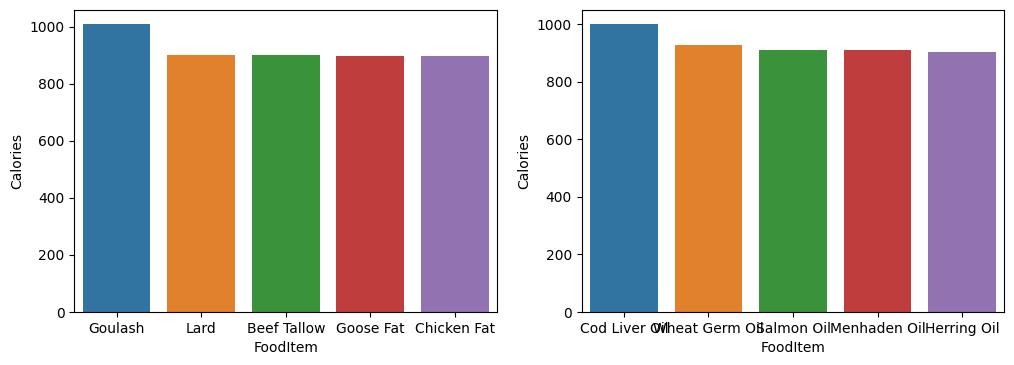

In [94]:
fig, ax = plt.subplots(1,2, dpi = 100, figsize = (12,4))
sns.barplot(data = solids_top5, x="FoodItem", y = "Calories", ax = ax[0])
sns.barplot(data = liquids_top5, x="FoodItem", y = "Calories", ax = ax[1])